<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/Shallow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import numpy as np
import matplotlib as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X=torch.linspace(0,3,300)
Y=torch.sin(5*math.pi*X)
target=Y[:]


In [ ]:
class Fun2(nn.Module):
  def __init__(self,X):
    super(Fun2,self).__init__()
    self.fc1=nn.Linear(300,80)
    self.fc2=nn.Linear(80,69)
    self.fc3=nn.Linear(69,300)

  def forward(self,X):
    out=self.fc1(X)
    out=F.relu(self.fc2(out))
    out=self.fc3(out)
    return out
    
model=Fun2(X)

print(model)

Fun2(
  (fc1): Linear(in_features=300, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=69, bias=True)
  (fc3): Linear(in_features=69, out_features=300, bias=True)
)


In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)

50669


In [ ]:
criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
loss_list2=[]
final2=torch.tensor(0)
Epochs=10
for epoch in range(Epochs):
  running_loss2=0.0
  for i in range(300):
    optimizer.zero_grad()
    outputs2=model(X)
    loss=criterion(outputs2,target)
    running_loss2+=loss.item()
    loss_list2.append(running_loss2)
    loss.backward(retain_graph=True)
    optimizer.step()
  print('[%d, %5d] loss: %.8f' %(epoch + 1, i, running_loss2 ))
  final2=(outputs2.flatten())


[1,   299] loss: 97.71413735
[2,   299] loss: 51.71487797
[3,   299] loss: 18.77192542
[4,   299] loss: 5.44550458
[5,   299] loss: 1.45425918
[6,   299] loss: 0.37913519
[7,   299] loss: 0.09821218
[8,   299] loss: 0.02539883
[9,   299] loss: 0.00656567
[10,   299] loss: 0.00169709


Text(0.5, 1.0, 'ModelLoss')

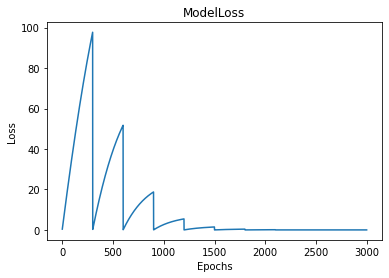

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ModelLoss')

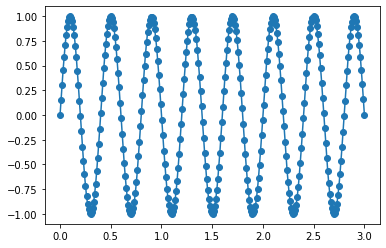

In [ ]:
plt.plot(X,Y)
graph2=final2
final_model=graph2.detach()
plt.scatter(X,final_model)